In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib as jb
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Veri seti hakkında bilgilendirme
* Pregnancies: Kaç hamilelik geçirdiği
* Glucose: Oral glukoz tolerans testinde 2 saatte plazma glukoz konsantrasyonu
* Blood Pressure: Kan basıncı "mmHg"
* Skin Thickness: Tricepsin deri kalınlığı "mmHg" 
* Insulin: 2 Saatlik Serum İnsülini "mu U/ml"
* BMI: Vücut kitle indexi "kg/m2"
* Diabetes Pedigree Function: Akrabalarda diyabet öyküsü ve bu akrabaların hastalarla genetik ilişkisi
* Age: Yaş "yıl"
* Sonuç: 1 hasta, 0 sağlıklı
  

In [2]:
# diabeties veri setini içeri yükleyeceğiz ve göz atacağız
df = pd.read_csv('../Data/diabetes.csv')
list = [df.head(), df.info(), df.describe(), df.isnull().sum(), df.shape]
list_name = ["df.head", "df.info", "df.describe", "df.isnull().sum", "df.shape"]
print("="*50)
for i in range(len(list)):
    print(f'{"="*50} {list_name[i]} {"="*50}')
    print(list[i])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
================================================== df.head ==================================================
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35     

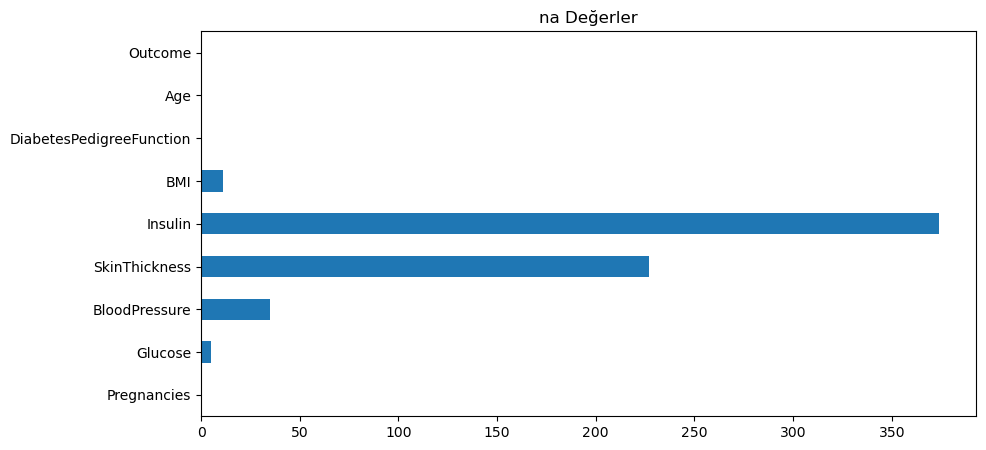

In [3]:
col = [   'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]

# 0 değerlerin olduğu sütunları inceleyelim ve na ile değiştirelim
for i in col:
    df[i].replace(0, np.nan,inplace=True)

df.isna().sum().plot(kind='barh', figsize=(10, 5))
plt.title('na Değerler')
plt.show()

============================== df.isna().sum ==============================
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


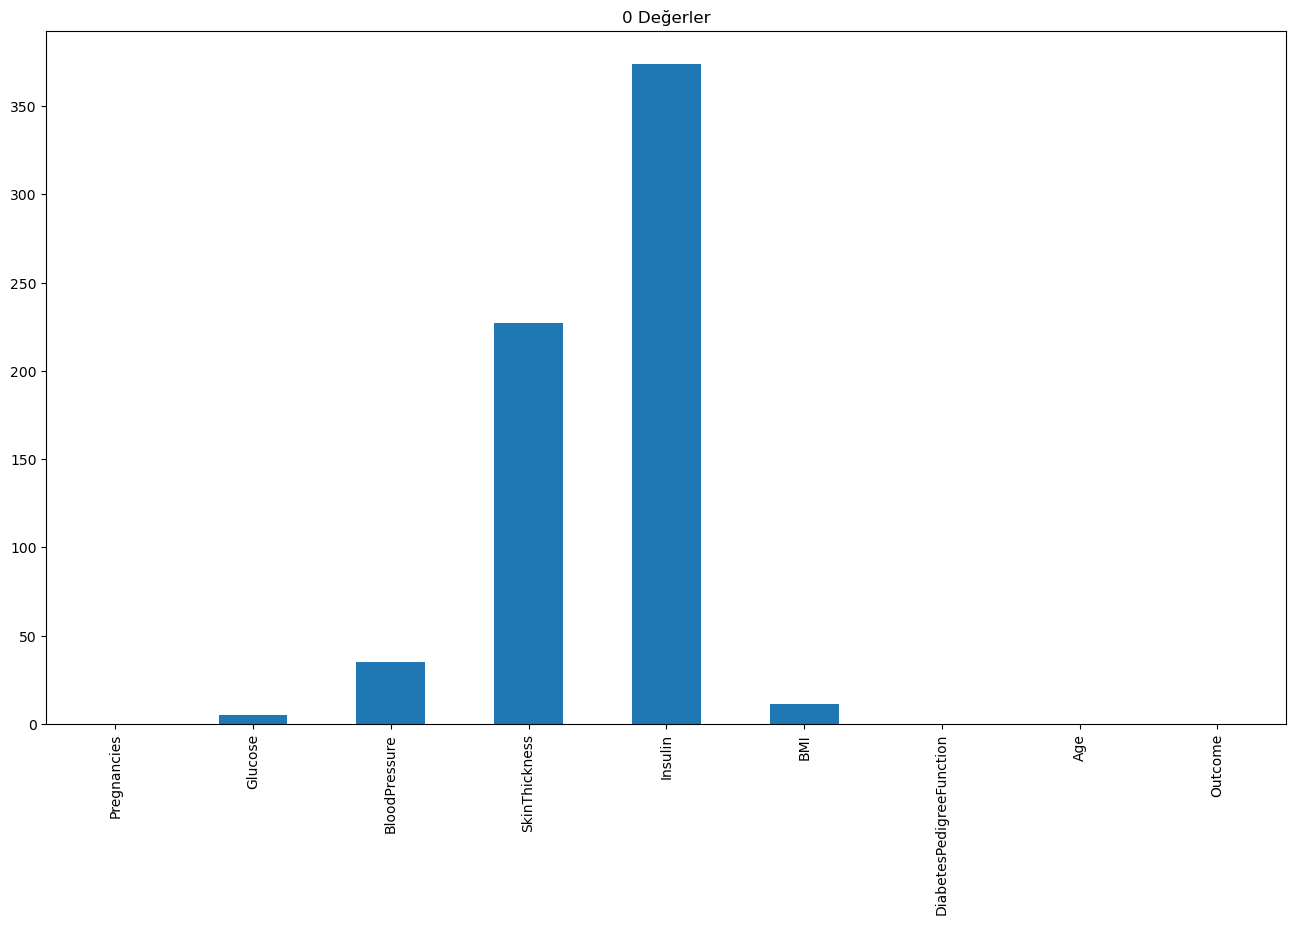

In [4]:
# Veri seti içerisindeki null değerleri kontrol edelim
def check_na(df):
    print("="*30)
    print(f'{"="*30} df.isna().sum {"="*30}')
    print(df.isna().sum())

# Veri setindeki na değerlerini görselleştiren fonksiyon oluşturalım
def plot_na(df, kind, figsize):
    df.isna().sum().plot(kind=kind, figsize=figsize)
    plt.title('0 Değerler')
    plt.show()        

check_na(df)
plot_na(df, kind='bar', figsize=(16, 9))

In [5]:
'''# Veri seti içerisindeki null değerleri medyan ile dolduralım  ve tekar kontrol edelim
for i in col:
    df[i] = df[i].fillna(df[i].median())

check_na(df)
plot_na(df, kind='bar', figsize=(16, 9))'''

"# Veri seti içerisindeki null değerleri medyan ile dolduralım  ve tekar kontrol edelim\nfor i in col:\n    df[i] = df[i].fillna(df[i].median())\n\ncheck_na(df)\nplot_na(df, kind='bar', figsize=(16, 9))"

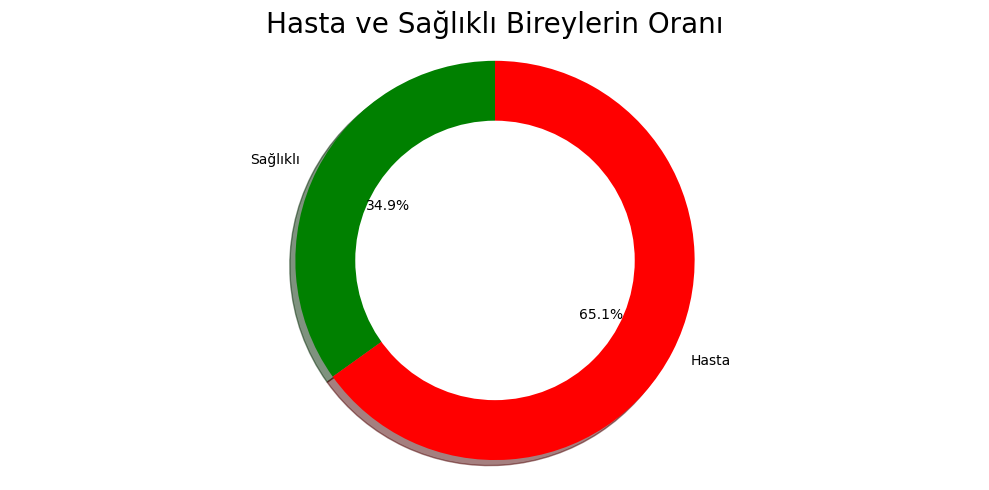

In [6]:
# Veri setinden Outcome sütununu çıkartıyoruz ve X, y olarak ayırıyoruz. Daha sonra Outcome değerinde hastalıklı ve sağlıklı bireyleri görselleştiriyoruz.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

labels=['Sağlıklı','Hasta']
sizes=[y[y==1].shape[0],y[y==0].shape[0]]
colors=['green','red']

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax.axis('equal')
plt.title("Hasta ve Sağlıklı Bireylerin Oranı", fontsize=20)
plt.tight_layout()
plt.show()

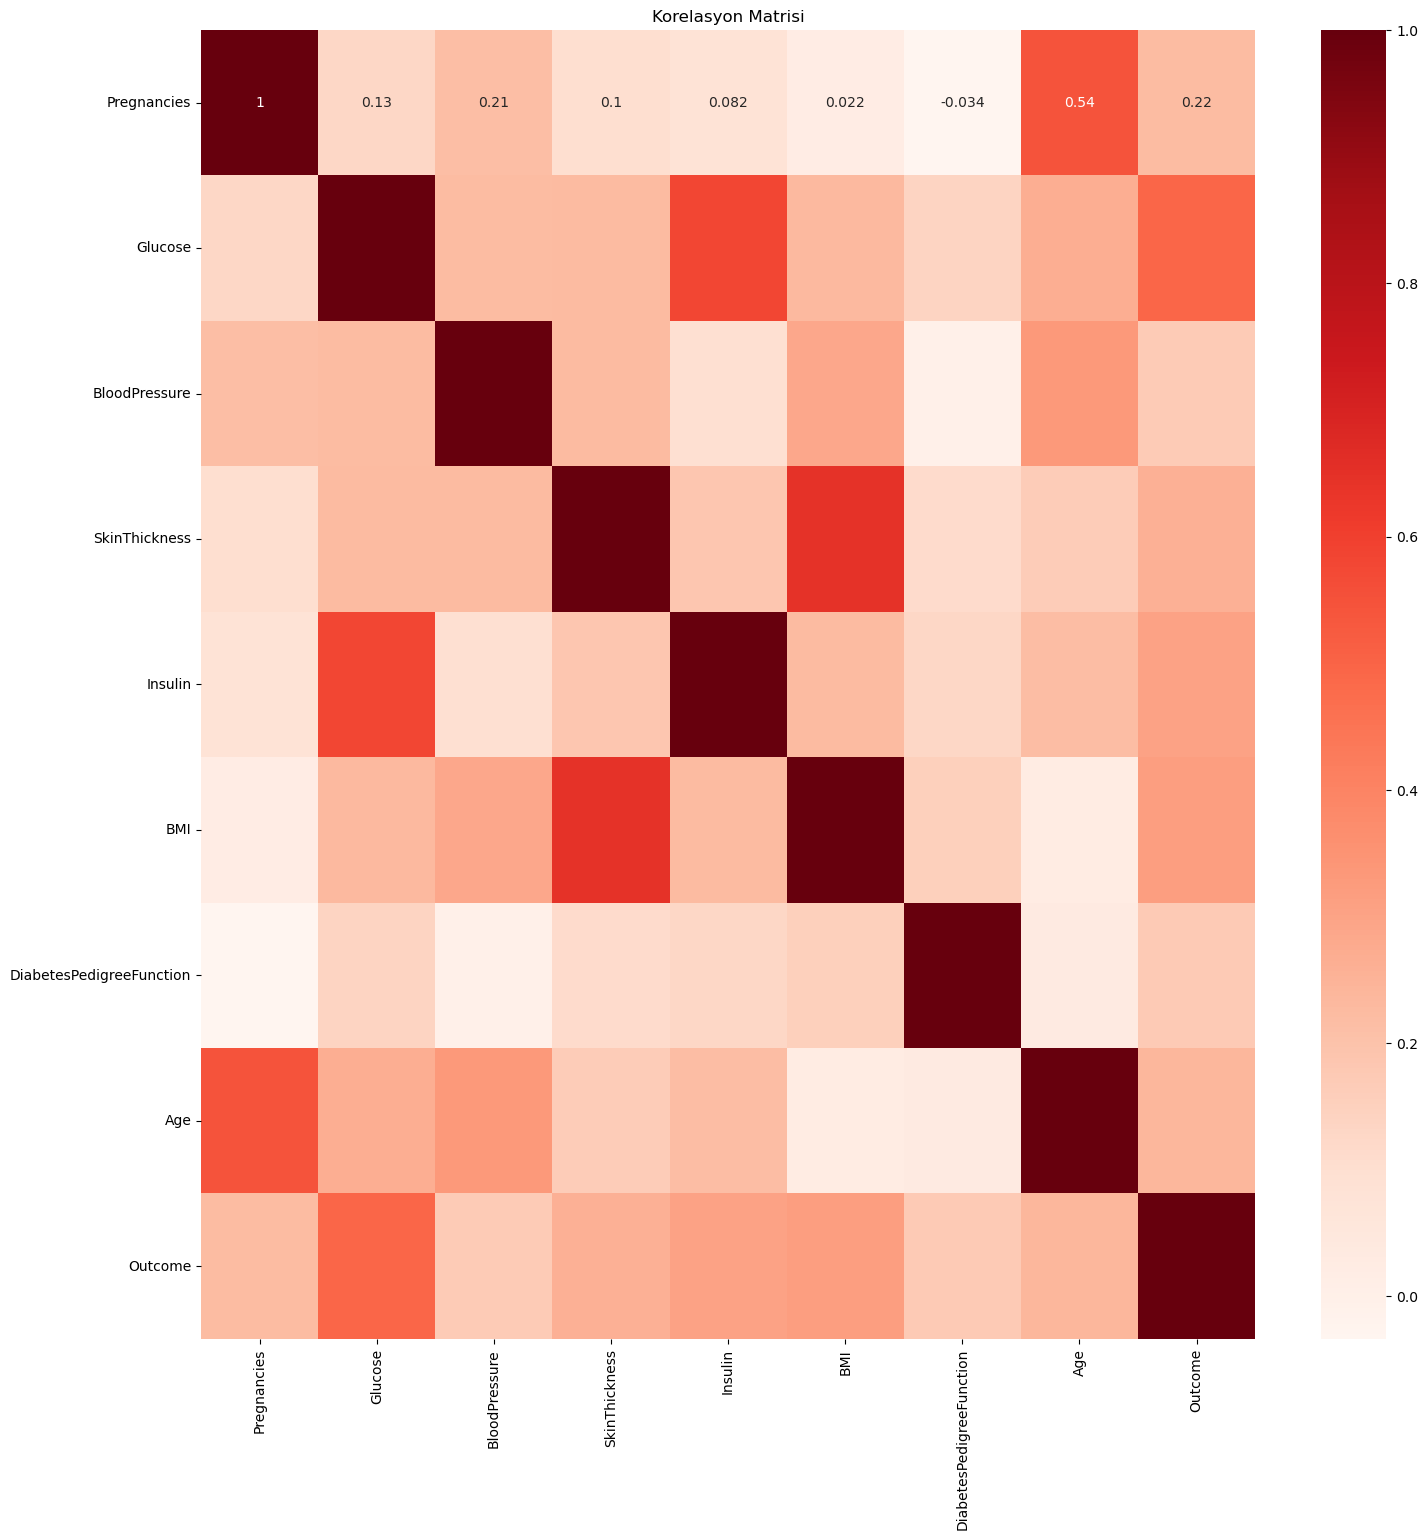

In [7]:
# Korelasyonu heatmap'de gösterelim
#!!!!!!heatmap içinde değerler gözükmüyor düzeltmen lazım

plt.figure(figsize=(17, 17))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Korelasyon Matrisi')
plt.show()

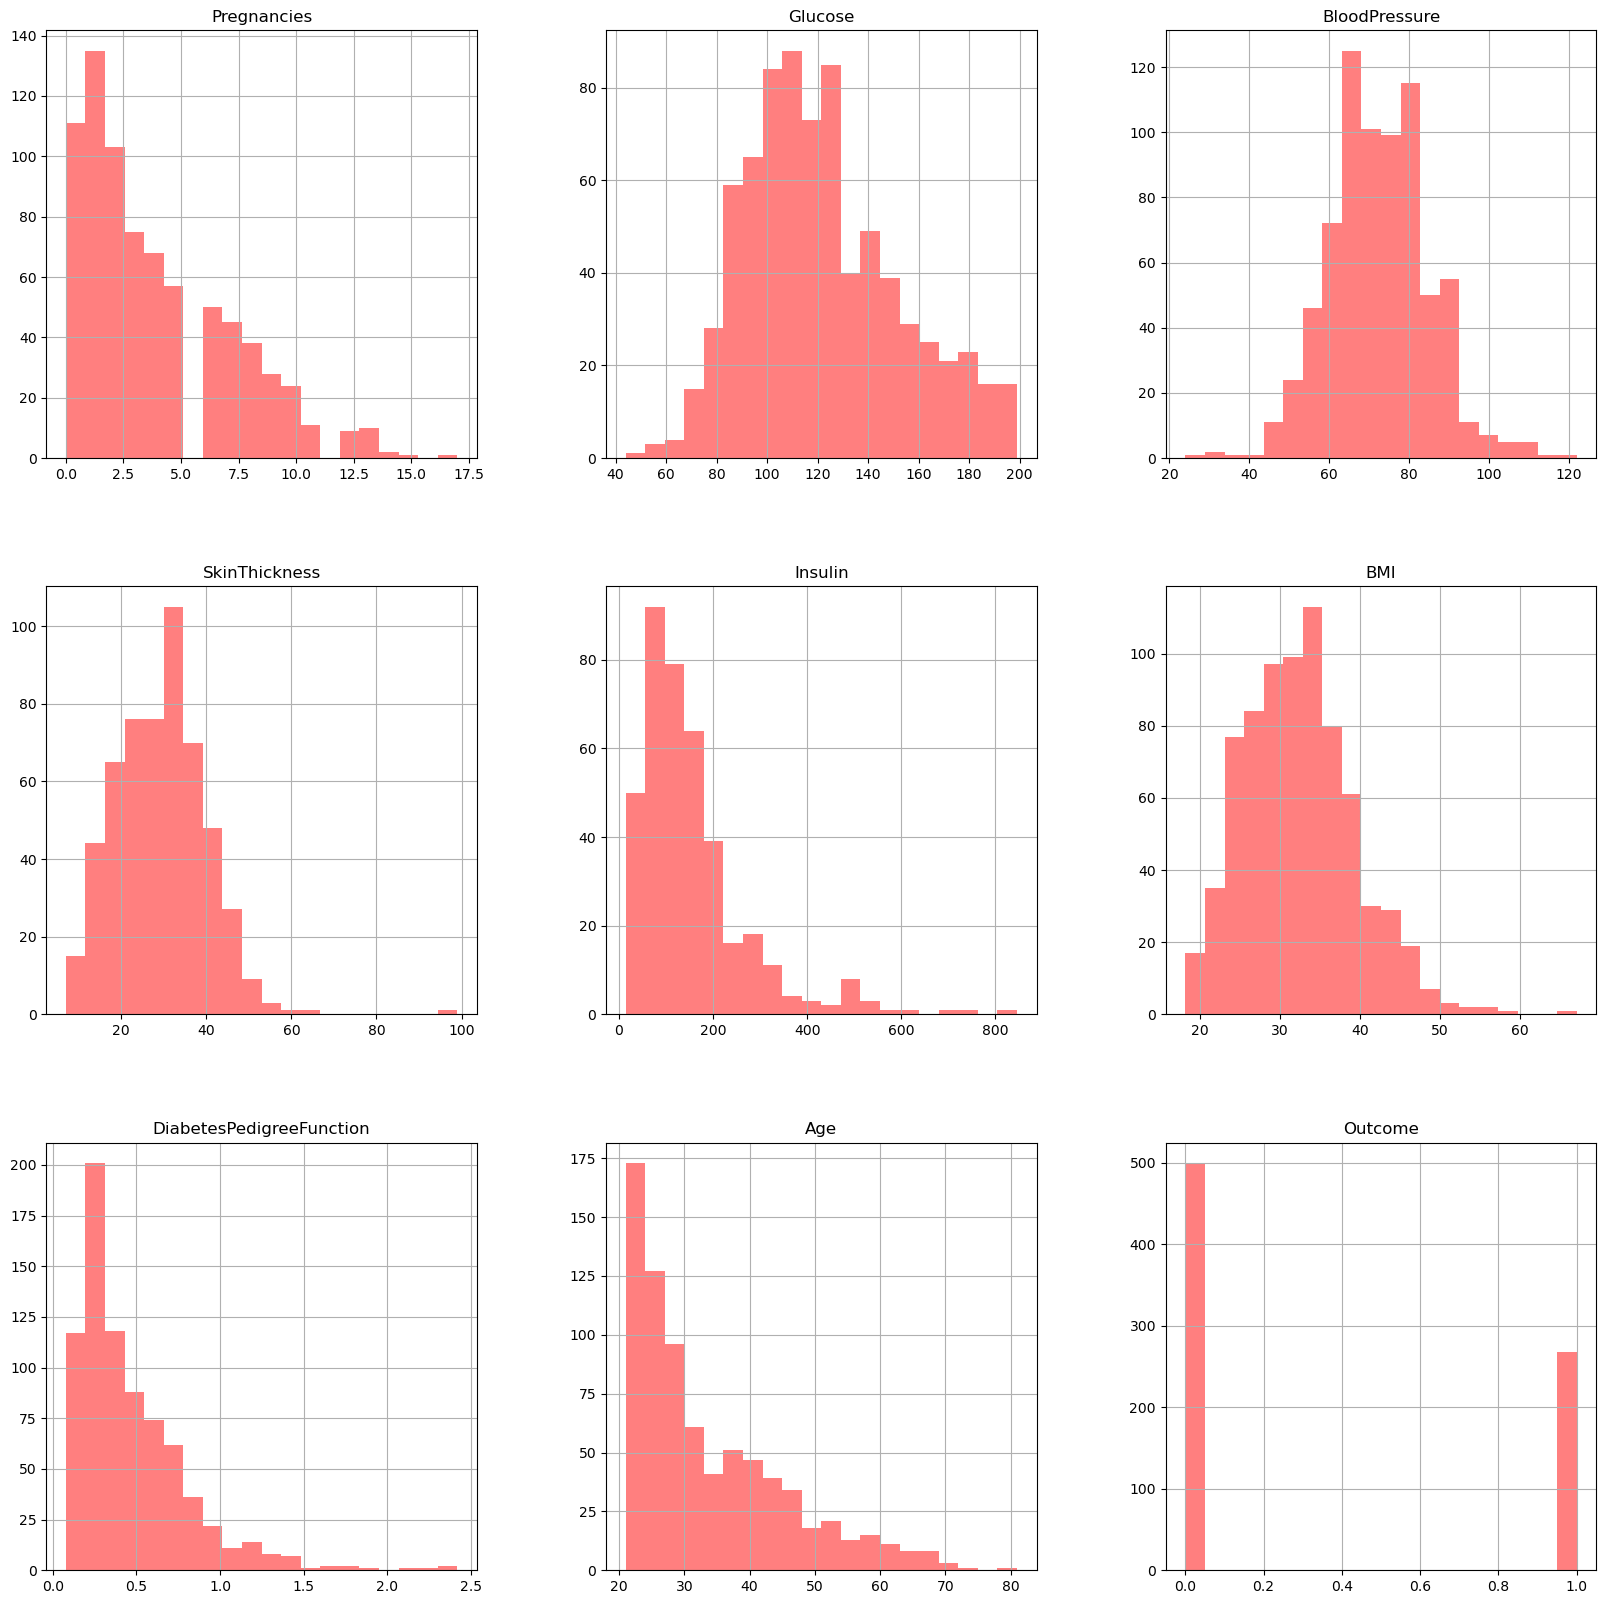

In [8]:
# Histogram ile veri setindeki sütunların dağılımını gözlemleyelim

df.hist(bins = 20, figsize=(20, 20), color='r', alpha=0.5)
plt.show()

c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

"sns.boxplot(ax=axes[0,0],x='Age' ,data=df,color='blue')\nsns.boxplot(ax=axes[0,1],x='BMI',data=df,color='red',fliersize=8)\nsns.boxplot(ax=axes[1,0],x='Pregnancies',data=df,color='purple',fliersize=8)\nsns.boxplot(ax=axes[1,1],x='Glucose',data=df,color='orange',fliersize=8)\nsns.boxplot(ax=axes[2,0],x='Insulin',data=df,color='cyan',fliersize=8)\nsns.boxplot(ax=axes[2,1],x='SkinThickness',data=df,color='green',fliersize=8)\nsns.boxplot(ax=axes[3,0],x='BloodPressure',data=df,color='red',fliersize=8)\nsns.boxplot(ax=axes[3,1],x='DiabetesPedigreeFunction',data=df,color='black',fliersize=8)"

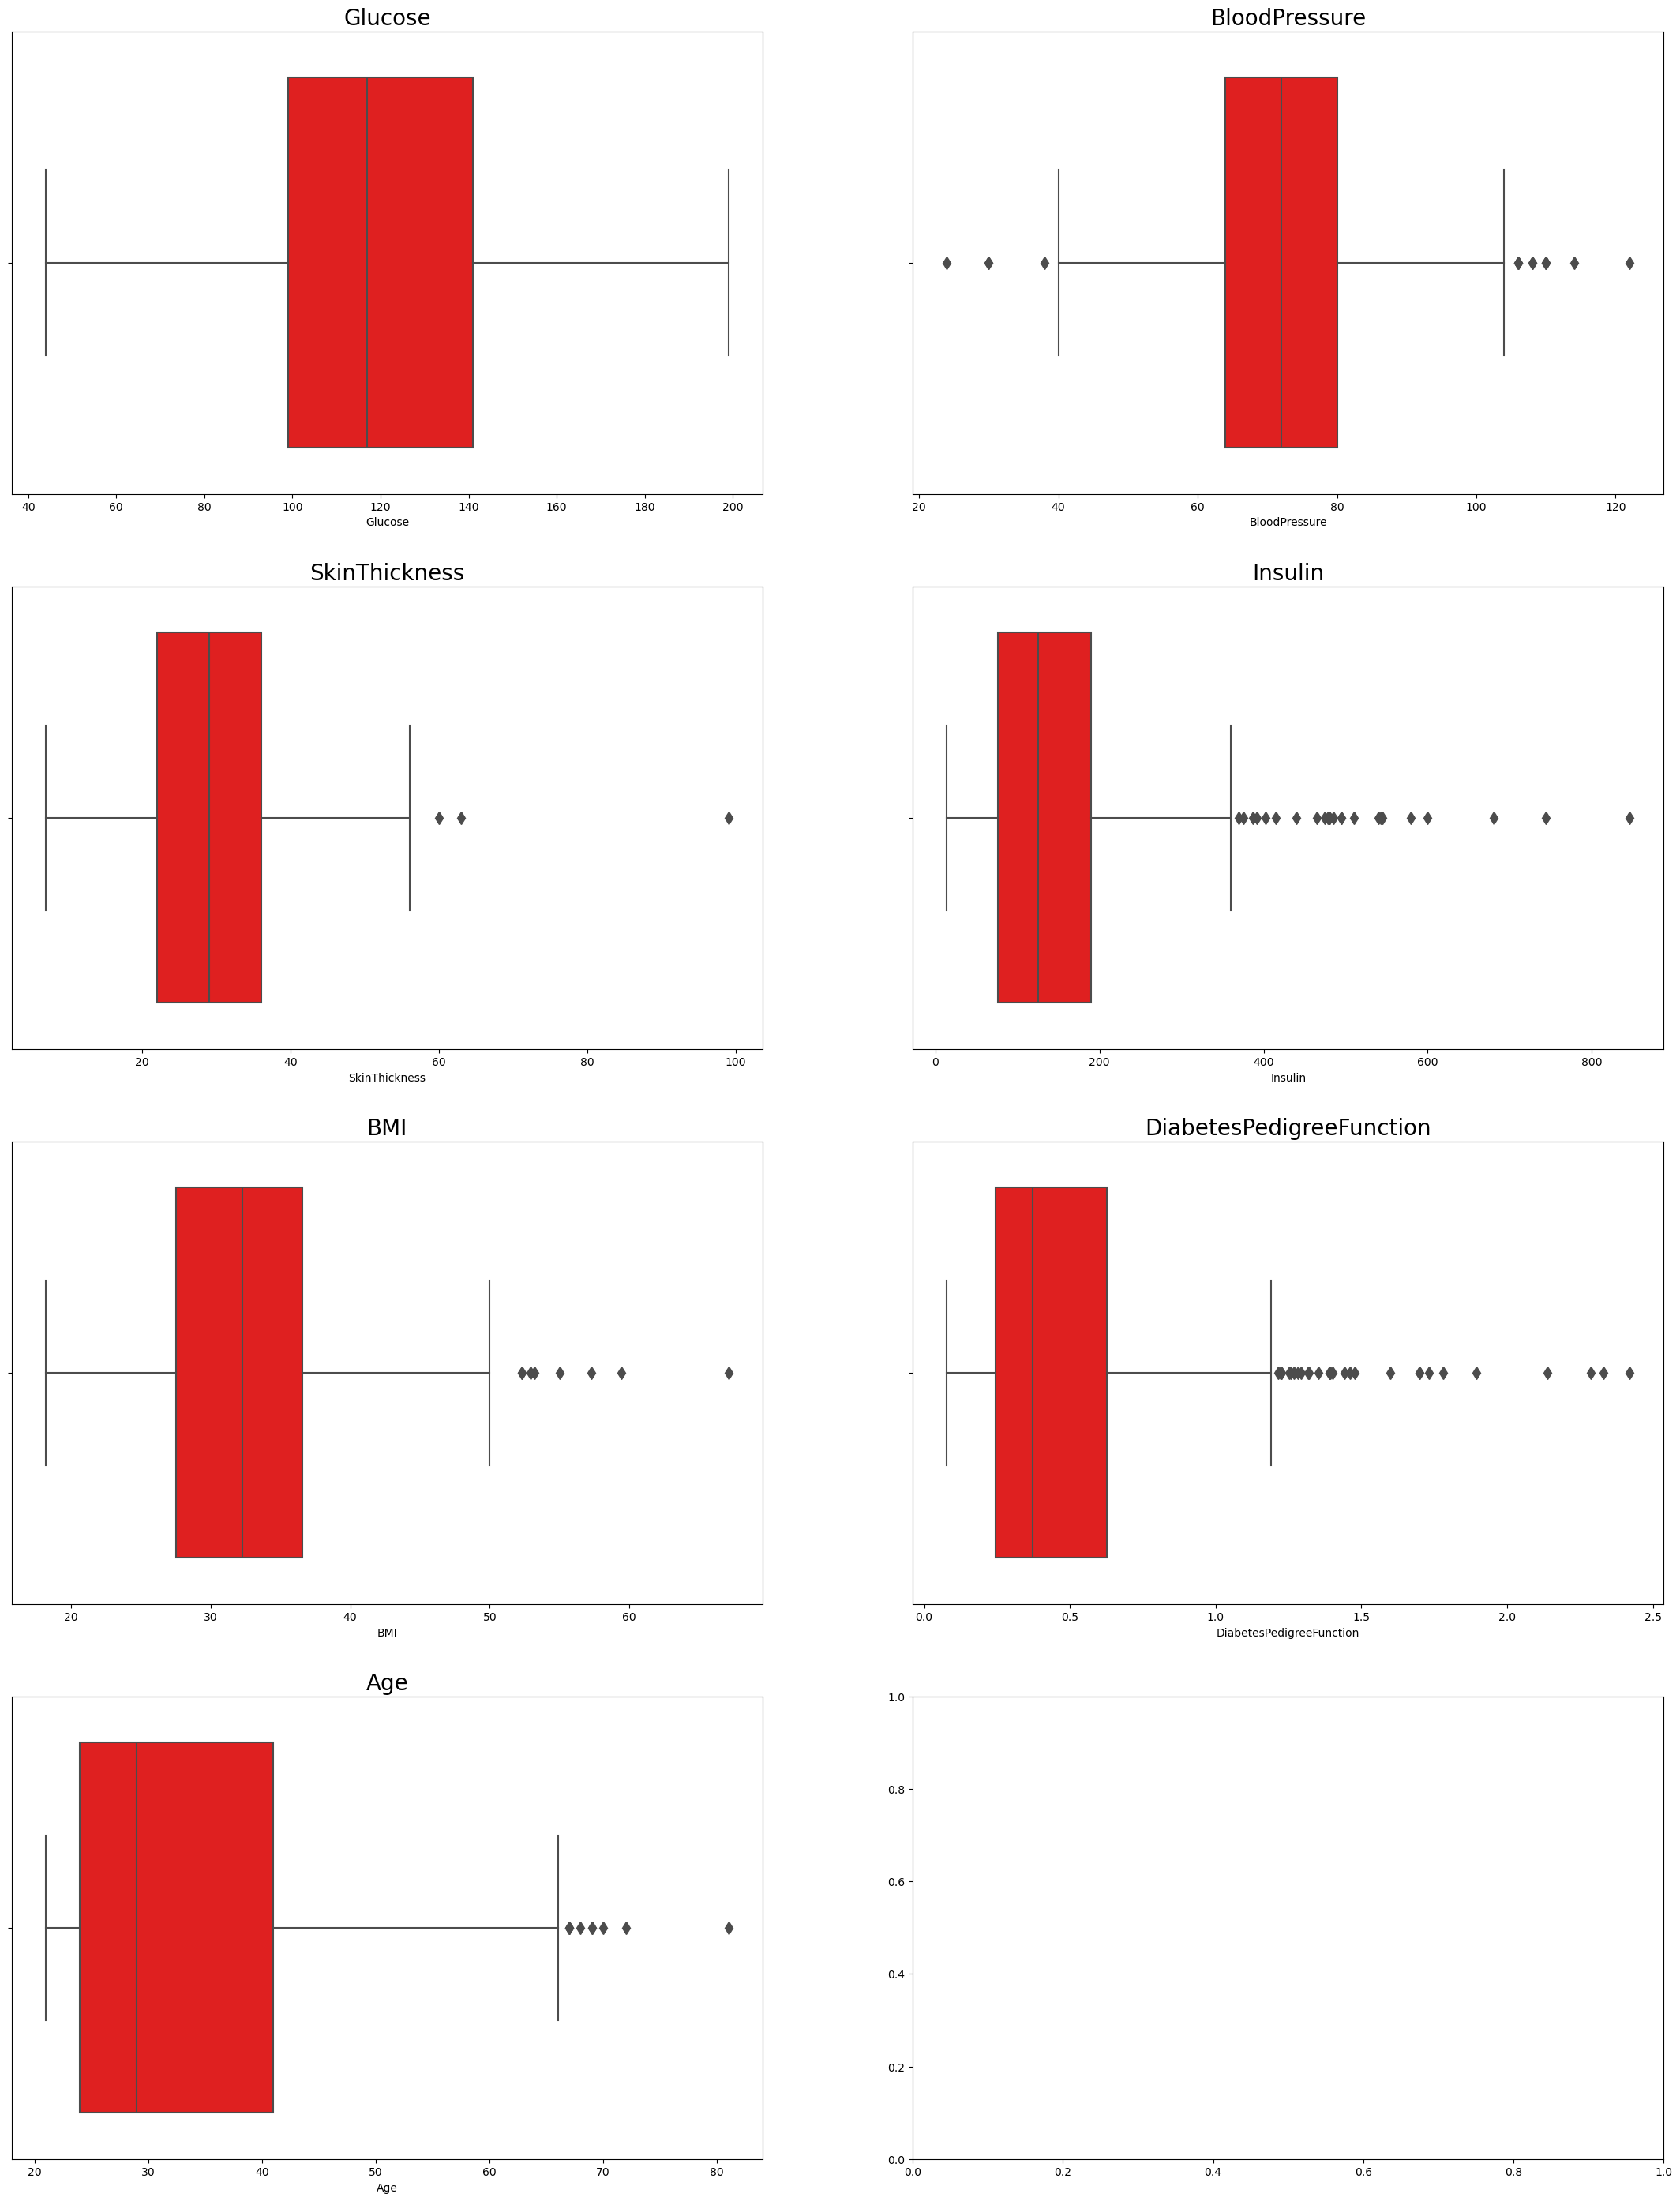

In [9]:
fig,axes=plt.subplots(4,2,figsize=(27,35))
for i in range (len(col)):
    sns.boxplot(ax=axes[i//2,i%2],x=col[i],data=df,color='red',fliersize=8)
    axes[i//2,i%2].set_title(col[i],fontsize=20)

'''    sns.boxplot(df[col[i]],ax=axes[i//2,i%2],color='red')
    axes[i//2,i%2].set_title(col[i],fontsize=20)'''
'''sns.boxplot(ax=axes[0,0],x='Age' ,data=df,color='blue')
sns.boxplot(ax=axes[0,1],x='BMI',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[1,0],x='Pregnancies',data=df,color='purple',fliersize=8)
sns.boxplot(ax=axes[1,1],x='Glucose',data=df,color='orange',fliersize=8)
sns.boxplot(ax=axes[2,0],x='Insulin',data=df,color='cyan',fliersize=8)
sns.boxplot(ax=axes[2,1],x='SkinThickness',data=df,color='green',fliersize=8)
sns.boxplot(ax=axes[3,0],x='BloodPressure',data=df,color='red',fliersize=8)
sns.boxplot(ax=axes[3,1],x='DiabetesPedigreeFunction',data=df,color='black',fliersize=8)'''

In [10]:
def det_median(col_name):
    select_not_null=df[df[col_name].notnull()]
    result=select_not_null[[col_name,'Outcome']].groupby(['Outcome'])[[col_name]].median().reset_index()
    return result

for i in col:
    print(det_median(i))


   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449
   Outcome   Age
0        0  27.0
1        1  36.0


In [11]:

df.loc[(df['Outcome']==0) & (df['BMI'].isnull()),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI'].isnull()),'BMI'] =34.3
df.loc[(df['Outcome']==0) & (df['Glucose'].isnull()),'Glucose'] =107.0
df.loc[(df['Outcome']==1) & (df['Glucose'].isnull()),'Glucose'] =140.0
df.loc[(df['Outcome']==0) & (df['BloodPressure'].isnull()),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure'].isnull()),'BloodPressure'] =74.5
df.loc[(df['Outcome']==0) & (df['Insulin'].isnull()),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin'].isnull()),'Insulin'] =169.5
df.loc[(df['Outcome']==0) & (df['SkinThickness'].isnull()),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness'].isnull()),'SkinThickness'] =32.0

In [12]:
df.loc[(df['Outcome']==0) & (df['Age']>63),'Age'] =27
df.loc[(df['Outcome']==1) & (df['Age']>63),'Age'] =36
df.loc[(df['Outcome']==0) & (df['BMI'] >52),'BMI'] =30.1
df.loc[(df['Outcome']==1) & (df['BMI']>52),'BMI'] =30.1
df.loc[(df['Outcome']==0) & (df['BloodPressure']>105),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']>105),'BloodPressure'] =74.5
df.loc[(df['Outcome']==0) & (df['Pregnancies']>12),'Pregnancies'] =2 
df.loc[(df['Outcome']==1) & (df['Pregnancies']>12),'Pregnancies'] =4
df.loc[(df['Outcome']==0) & (df['Insulin']>250),'Insulin'] =102.5
df.loc[(df['Outcome']==1) & (df['Insulin']>250),'Insulin'] =169.5
df.loc[(df['Outcome']==0) & (df['SkinThickness']>40),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']>40),'SkinThickness'] =32.0
df.loc[(df['Outcome']==0) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.336
df.loc[(df['Outcome']==1) & (df['DiabetesPedigreeFunction']>1),'DiabetesPedigreeFunction'] =0.449
df.loc[(df['Outcome']==0) & (df['SkinThickness']<20),'SkinThickness'] =27.0
df.loc[(df['Outcome']==1) & (df['SkinThickness']<20),'SkinThickness'] =32.0
df.loc[(df['Outcome']==0) & (df['BloodPressure']<40),'BloodPressure'] =70.0
df.loc[(df['Outcome']==1) & (df['BloodPressure']<40),'BloodPressure'] =74.5

c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

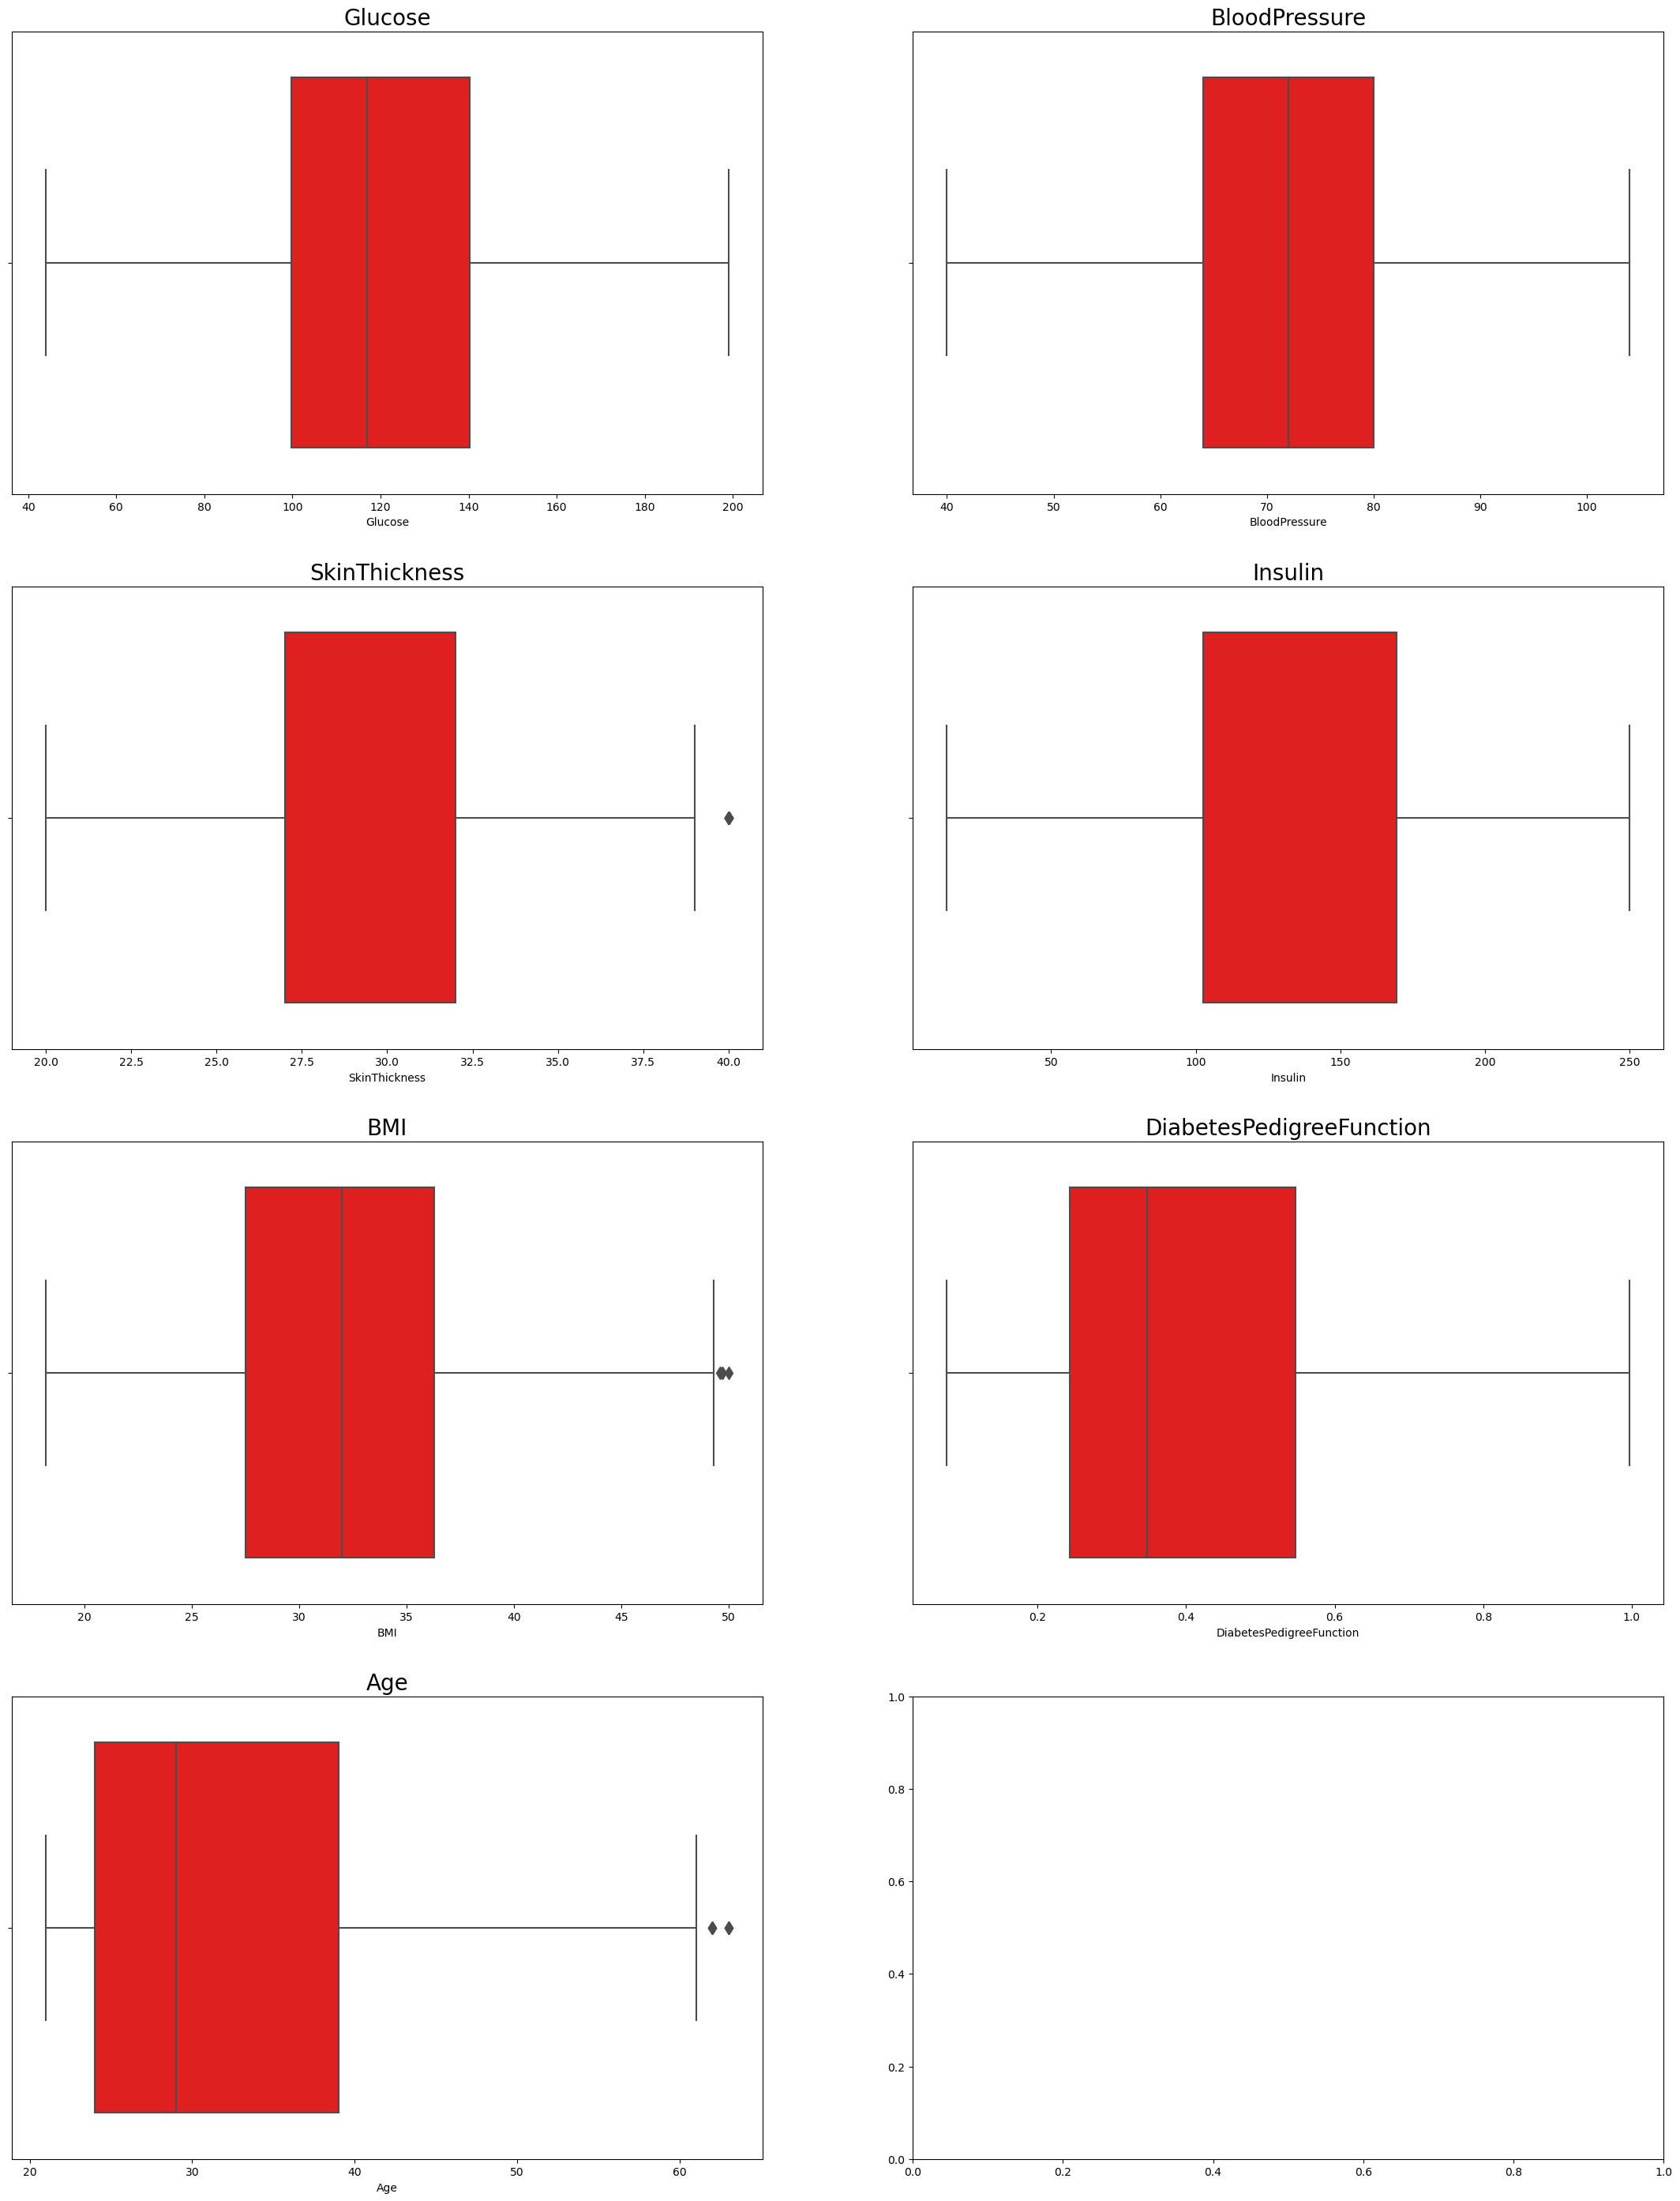

In [13]:
fig,axes=plt.subplots(4,2,figsize=(27,35))
for i in range (len(col)):
    sns.boxplot(ax=axes[i//2,i%2],x=col[i],data=df,color='red',fliersize=8)
    axes[i//2,i%2].set_title(col[i],fontsize=20)

In [14]:
# Düzenlediğimiz verimizi tekrar yükleyelim
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

model=xgb.XGBClassifier(random_state=1,learning_rate=0.02)
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_predict_xg=model.predict(X_test)
print(classification_report(y_test,y_predict_xg))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.84      0.91      0.88        47

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.93      0.92      0.92       154



c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is

In [15]:
# Veri setimize K-n fold yönemi ile bölüyoruz. 5 parçaya bölüyoruz.
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [  0   1   3   4   5   6   8   9  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  29  32  34  35  36  37  38  40  41  42  43
  44  45  46  47  48  50  51  52  53  56  57  58  59  60  61  62  64  68
  69  70  71  73  74  75  80  82  83  85  87  88  89  90  91  92  93  94
  95  96  98  99 100 102 103 104 105 106 107 108 110 111 112 113 114 115
 116 117 119 121 122 123 124 125 126 127 128 129 130 131 132 134 135 136
 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 156 157
 158 159 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177
 178 179 180 182 183 184 185 186 187 188 189 190 191 194 195 197 198 200
 201 202 203 205 206 207 214 216 217 219 221 222 223 224 225 226 228 229
 230 231 232 233 235 236 237 238 240 241 242 243 245 246 247 248 249 251
 252 253 255 256 257 258 260 261 262 263 264 266 267 268 269 270 271 272
 273 274 276 277 278 279 280 282 283 284 285 286 287 288 289 291 292 293
 294 295 297 298 301 302 303 304 305 306 307

In [16]:
# Veri setinin hepsini kontrol edelim
print(f'x shape is {X.shape} and y shape is {y.shape}')
print(f'X_train is {X_train.shape} and y_train is {y_train.shape}')
print(f'X_test is {X_test.shape} and y_test is {y_test.shape}')

# Veri setinde na değerlerini kontrol edelim
print(f'X_train is {X_train.isna().sum().sum()} and y_train is {y_train.isna().sum()} have NaN data')
print(f'X_test is {X_test.isna().sum().sum()} and y_test is {y_test.isna().sum().sum()} have NaN data')


x shape is (768, 8) and y shape is (768,)
X_train is (615, 8) and y_train is (615,)
X_test is (153, 8) and y_test is (153,)
X_train is 0 and y_train is 0 have NaN data
X_test is 0 and y_test is 0 have NaN data


In [17]:
# sklearn kütüphanesi ile pipeline kuracağız
# Pipeline içerisinde veri ön işleme ve modelleme adımlarını bir arada kullanacağız
# Veri ön işleme adımlarında StandardScaler kullanacağız
# Modelleme adımında ise XGBoost, Catboost ve Lightgbm kullanacağız
# Modelleme adımlarında GridSearchCV kullanacağız
# GridSearchCV ile modelimizin en iyi parametrelerini bulacağız
# GridSearchCV ile modelimizin en iyi parametrelerini bulduktan sonra en iyi parametreler ile modelimizi kuracağız
# Modelimizin başarı skorlarını ekrana yazdıracağız

scaler = StandardScaler()
pca = PCA()
xgb_model = xgb.XGBClassifier()
lgb_model = lgb.LGBMClassifier()
cb_model = cb.CatBoostClassifier()

pipe_xgb = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('xgb_model', xgb_model)])
pipe_lgb = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('lgb_model', lgb_model)])
pipe_cb = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('cb_model', cb_model)])

'''n_components = [2, 3, 4, 5, 6, 7, 8]
model_learning_rate = [0.01, 0.1, 0.2, 0.3]
model_max_depth = [3, 5, 7, 9]
n_estimators = [100, 200, 300, 400, 500]

test_colsample_bytree = [0.6, 0.8]
test_subsample = [0.4, 0.6]
test_reg_alpha = [0.01, 0.1, 1, 10]
test_reg_lambda = [0.01, 0.1, 1, 10]

'''

test_n_components = [4]
test_learning_rate = [0.02, 0.1]
test_max_depth = [2, 4]
test_n_estimators = [100, 250]

params_xgb = {'pca__n_components': test_n_components,
                'xgb_model__learning_rate': test_learning_rate,
                'xgb_model__max_depth': test_max_depth,
                'xgb_model__n_estimators': test_n_estimators}
params_lgb = {'pca__n_components': test_n_components,
                'lgb_model__learning_rate': test_learning_rate,
                'lgb_model__max_depth': test_max_depth,
                'lgb_model__n_estimators': test_n_estimators}
params_cb = {'pca__n_components': test_n_components,
                'cb_model__learning_rate': test_learning_rate,
                'cb_model__max_depth': test_max_depth,
                'cb_model__n_estimators': test_n_estimators}
params = [params_xgb, params_lgb, params_cb]
pipe = [pipe_xgb, pipe_lgb, pipe_cb]
pipe_name = ["XGB", "LGB", "CB"]

for i in range(len(pipe)):
    print(f'{"="*50} {pipe_name[i]} {"="*50}')
    grid = GridSearchCV(pipe[i], params[i], cv=5, n_jobs=-1, verbose=2).fit(X, y)
    grid.fit(X_train, y_train)
    print(f'En iyi parametreler: {grid.best_params_}')
    print(f'En iyi skor: {grid.best_score_}')
    print(f'En iyi model: {grid.best_estimator_}')
    print(f'{"="*50} {pipe_name[i]} {"="*50}')


================================================== XGB ==================================================


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


En iyi parametreler: {'pca__n_components': 4, 'xgb_model__learning_rate': 0.02, 'xgb_model__max_depth': 4, 'xgb_model__n_estimators': 250}
En iyi skor: 0.8455284552845528
En iyi model: Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=4)),
                ('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_ste

c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 268, number of negative: 500
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [18]:
# modelleri joblib ile kaydediyoruz
jb.dump(pipe_xgb, '../PretrainedModel/xgb_model.joblib')
jb.dump(pipe_lgb, '../PretrainedModel/lgb_model.joblib')
jb.dump(pipe_cb, '../PretrainedModel/cb_model.joblib')


['../PretrainedModel/cb_model.joblib']

In [19]:
# modelleri joblib ile yüklüyoruz
load_xgb_model = jb.load('../PretrainedModel/xgb_model.joblib')
load_lgb_model = jb.load('../PretrainedModel/lgb_model.joblib')
load_cb_model = jb.load('../PretrainedModel/cb_model.joblib')

load_xgb_model.fit(X_train, y_train)
load_lgb_model.fit(X_train, y_train)
load_cb_model.fit(X_train, y_train)

c:\Users\musaa\anaconda3\envs\m_galaksi\Lib\site-packages\xgboost\data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[LightGBM] [Info] Number of positive: 210, number of negative: 405
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1643
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341463 -> initscore=-0.656780
[LightGBM] [Info] Start training from score -0.656780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('cb_model',
                 <catboost.core.CatBoostClassifier object at 0x000002678E808450>)])

In [20]:
print(f'XGB Model Score: {load_xgb_model.score(X_test, y_test)}')
print(f'LGB Model Score: {load_lgb_model.score(X_test, y_test)}')
print(f'CB Model Score: {load_cb_model.score(X_test, y_test)}')

# accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
print(f'{"="*50}')
print(f'XGB Model Accuracy Score: {accuracy_score(y_test, load_xgb_model.predict(X_test))}')
print(f'LGB Model Accuracy Score: {accuracy_score(y_test, load_lgb_model.predict(X_test))}')
print(f'CB Model Accuracy Score: {accuracy_score(y_test, load_cb_model.predict(X_test))}')
print(f'{"="*50}')
print(f'XGB Model F1 Score: {f1_score(y_test, load_xgb_model.predict(X_test))}')
print(f'LGB Model F1 Score: {f1_score(y_test, load_lgb_model.predict(X_test))}')
print(f'CB Model F1 Score: {f1_score(y_test, load_cb_model.predict(X_test))}')
print(f'{"="*50}')
print(f'XGB Model Confusion Matrix\n {confusion_matrix(y_test, load_xgb_model.predict(X_test))}')
print(f'LGB Model Confusion Matrix\n {confusion_matrix(y_test, load_lgb_model.predict(X_test))}')
print(f'CB Model Confusion Matrix\n {confusion_matrix(y_test, load_cb_model.predict(X_test))}')
print(f'{"="*50}')
print(f'XGB Model Classification Report:\n {classification_report(y_test, load_xgb_model.predict(X_test))}')
print(f'LGB Model Classification Report:\n {classification_report(y_test, load_lgb_model.predict(X_test))}')
print(f'CB Model Classification Report:\n {classification_report(y_test, load_cb_model.predict(X_test))}')
print(f'{"="*50}')


XGB Model Score: 0.8366013071895425
LGB Model Score: 0.8627450980392157
CB Model Score: 0.8823529411764706
XGB Model Accuracy Score: 0.8366013071895425
LGB Model Accuracy Score: 0.8627450980392157
CB Model Accuracy Score: 0.8823529411764706
XGB Model F1 Score: 0.7826086956521741
LGB Model F1 Score: 0.8141592920353982
CB Model F1 Score: 0.8421052631578947
XGB Model Confusion Matrix
 [[83 12]
 [13 45]]
LGB Model Confusion Matrix
 [[86  9]
 [12 46]]
CB Model Confusion Matrix
 [[87  8]
 [10 48]]
XGB Model Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87        95
           1       0.79      0.78      0.78        58

    accuracy                           0.84       153
   macro avg       0.83      0.82      0.83       153
weighted avg       0.84      0.84      0.84       153

LGB Model Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        95